<a href="https://colab.research.google.com/github/abhinav-exp/Forecasting-CryptoCurrency-Prices/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Activation, Dense
import matplotlib.pyplot as plt

In [2]:
GitHubDataLink = 'https://raw.githubusercontent.com/abhinav-exp/Forecasting-CryptoCurrency-Prices/master/Datasets/'
InputFileLink = GitHubDataLink + 'DataBTC2017.csv'
data1 = pd.read_csv(InputFileLink, header=0, index_col=0)

In [3]:
def split_sequence(sequence, n_steps):
  X= list()
  for i in range(len(sequence) - n_steps):
    end_ix = i + n_steps
    seq_x= sequence.values[i:end_ix, 0]
    X.append(seq_x)
  return pd.DataFrame(X)

data2 = split_sequence(data1, 10)
print(data2.shape)
print(data2)

(771, 10)
           0        1        2         3         4         5         6  \
0    2515.25  2596.98  2725.08   2643.35   2679.99   2690.76   2574.84   
1    2596.98  2725.08  2643.35   2679.99   2690.76   2574.84   2505.61   
2    2725.08  2643.35  2679.99   2690.76   2574.84   2505.61   2407.91   
3    2643.35  2679.99  2690.76   2574.84   2505.61   2407.91   2575.75   
4    2679.99  2690.76  2574.84   2505.61   2407.91   2575.75   2553.12   
..       ...      ...      ...       ...       ...       ...       ...   
766  9751.24  9880.67  9841.96   9468.92   9549.70   9503.32   9580.00   
767  9880.67  9841.96  9468.92   9549.70   9503.32   9580.00  10099.00   
768  9841.96  9468.92  9549.70   9503.32   9580.00  10099.00  10417.24   
769  9468.92  9549.70  9503.32   9580.00  10099.00  10417.24  10533.07   
770  9549.70  9503.32  9580.00  10099.00  10417.24  10533.07  10820.75   

            7         8         9  
0     2505.61   2407.91   2575.75  
1     2407.91   2575.75   255

In [34]:
train_x = data2.iloc[:int(0.85*len(data2)), :9]
train_y = data2.iloc[:int(0.85*len(data2)), 9]
test_x = data2.iloc[int(0.85*len(data2)):, :9]
test_y = data2.iloc[int(0.85*len(data2)):, 9]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(655, 9)
(655,)
(116, 9)
(116,)


In [26]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=9))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(train_x, train_y, epochs=2000, verbose=0)

In [29]:
yhat = model.predict(test_x, verbose=0)
print(yhat.shape)

(116, 1)


In [40]:
test_y.reset_index()[9]

0       5066.22
1       5164.27
2       5029.99
3       5202.90
4       5227.00
         ...   
111    10533.07
112    10820.75
113    10997.82
114    11775.14
115    11440.08
Name: 9, Length: 116, dtype: float64

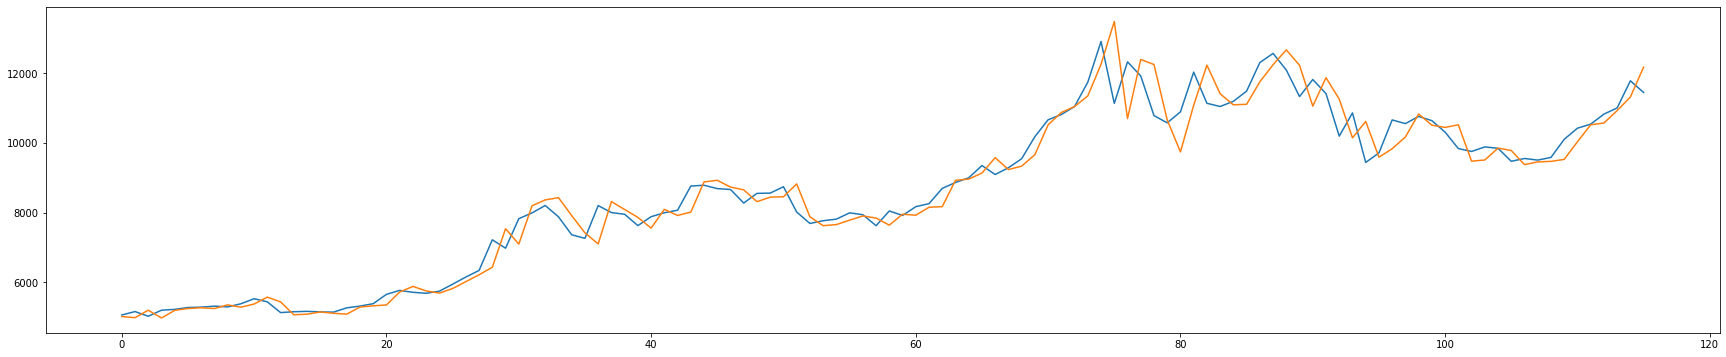

In [41]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(yhat)
plt.show()